In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
images = []
images_shape = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if os.path.join(dirname, filename) == '/kaggle/input/390-images-of-popular-graph-theory-graphs/graph_info.csv':
            continue
        else:
            image = Image.open(os.path.join(dirname, filename)).convert("L")
            images.append(np.asarray(image))
            images_shape.append(np.array(np.asarray(image).shape))
images_shape = np.array(images_shape)
median_image_height = np.int(np.median(images_shape[:,0]))
median_image_width = np.int(np.median(images_shape[:,1]))


images = [cv2.resize(img,(median_image_height,median_image_width)) for img in images]

## Vertex Detection

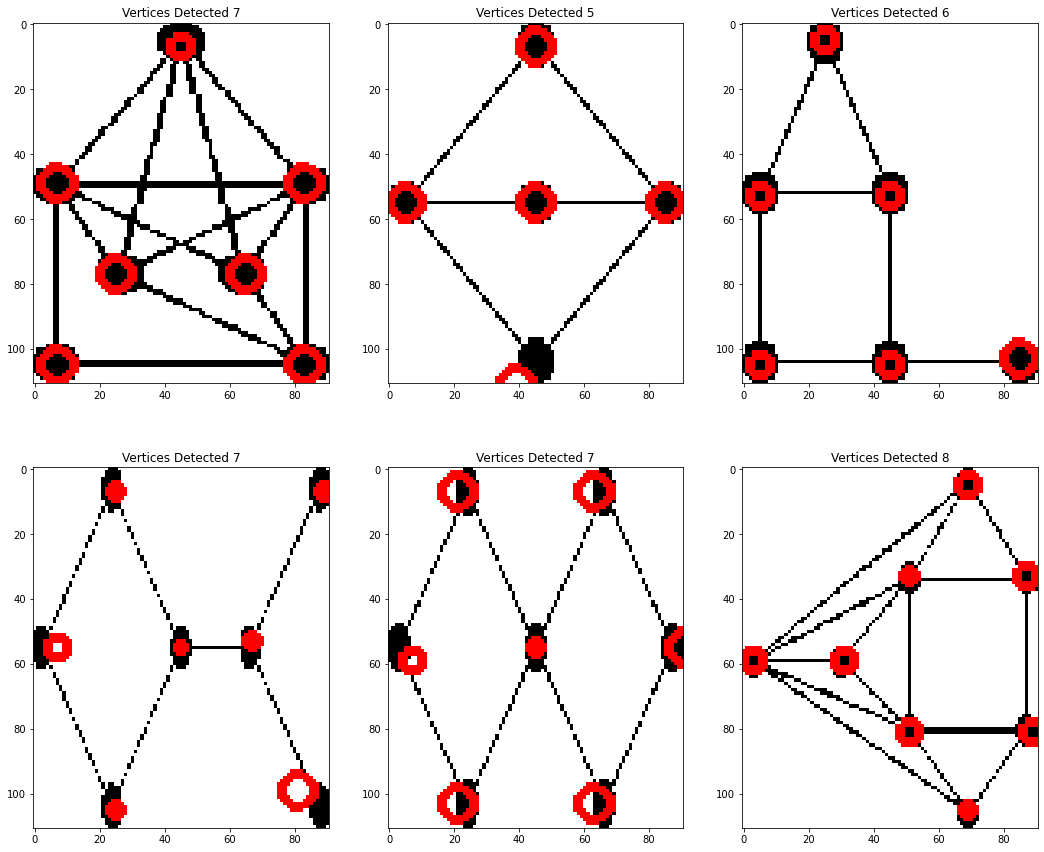

In [ ]:
plt.figure(figsize=(18,15))
for i in range(0,6):
    img = images[i]
    img[img<180]=0
    img[img>=180] = 255
    img = cv2.dilate(img,np.ones((3,3)))
    img = cv2.dilate(img,np.ones((3,3)))
    img = cv2.erode(img,np.ones((3,3)))

    circles = cv2.HoughCircles(img,method=cv2.HOUGH_GRADIENT,dp=2,minDist=15,
                               param1=90,param2=3.1,minRadius=1,maxRadius=7)

    circles = circles.astype(np.int)
    rgb = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
    plt.subplot(2,3,i+1)
    for (x,y,r) in circles[0]:
        cv2.circle(rgb,(x,y),r,(255,0,0),2)
    plt.title(f'Vertices Detected {len(circles[0])}')

    plt.imshow(rgb)

## Edge Detection

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


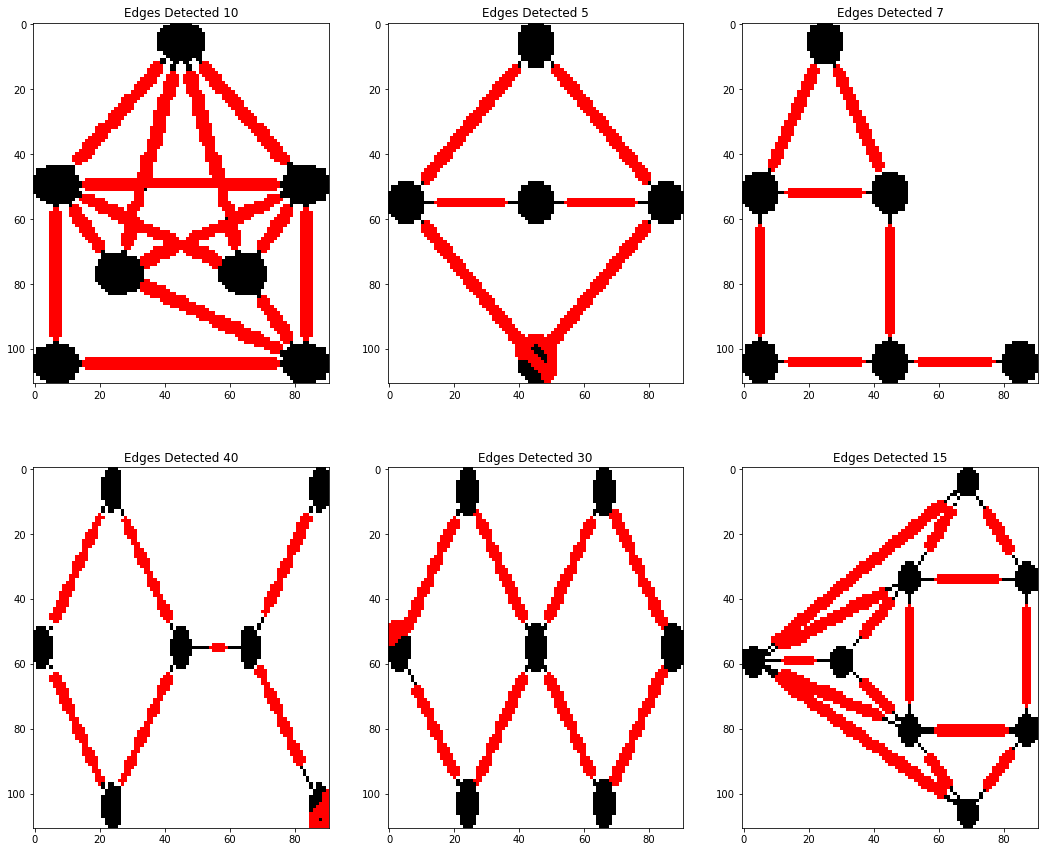

In [ ]:
plt.figure(figsize=(18,15))

for i in range(0,6):
    img = images[i]
    img = cv2.dilate(img,np.ones((3,3)))
    img = cv2.dilate(img,np.ones((3,3)))
    img = cv2.erode(img,np.ones((3,3)))

    circles = cv2.HoughCircles(img,method=cv2.HOUGH_GRADIENT,dp=2,minDist=15,
                               param1=90,param2=3.1,minRadius=1,maxRadius=7)

    circles = circles.astype(np.int)
    circless = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
    plt.subplot(2,3,i+1)
    for (x,y,r) in circles[0]:
        cv2.circle(circless,(x,y),9,(255,255,255),-1)
    
    ####
    img = circless.copy()
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = 255-img
    ctrs , _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plt.subplot(2,3,i+1)

    rgb = cv2.cvtColor(images[i],cv2.COLOR_GRAY2RGB)
    cv2.drawContours(rgb,ctrs,-1,(255,0,0),2)
    
    plt.title(f'Edges Detected {len(ctrs)}')
    plt.imshow(rgb)